* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate)
* Print all fluxes, find biomass function and NADPH functions (in PPP): 'TALA'=Transaldolase, 'TKT1'=Transketolase, 'TKT2'=Transketolase, 'RPI'=Ribose-5-phosphate isomerase, 'G6PDH2rp'=Glucose 6-phosphate dehydrogenase, 'GND'=Phosphogluconate dehydrogenase, 'PGLp'=6-phosphogluconolactonase

* Make a graph where specific growth rate is on x-axis and the flux is on y-axis


In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
# Changing the objective function
model.objective = "ATPtm" 
solution = model.optimize('minimize') # minimize the objective function

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [4]:
# Get growth media
model.medium #returns a dictionary that contains the upper flux 
# bounds for all active exchange fluxes (the ones having non-zero flux bounds
# You can modify a growth medium of a model by assigning a dictionary 
# to model.medium that maps exchange reactions to their respective upper import bounds:
# medium = model.medium
# medium["EX_o2_e"] = 0.0
# model.medium = medium

# # Make it to a pd dataframe
# growth_medium = pd.DataFrame(model.medium, index=['Upper flux bound'])
# growth_medium
model.reactions.EX_glc__D_e.bounds = -9999, 9999
model.optimize('minimize')
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,9434,6,100.00%
o2_e,EX_o2_e,5.66E+04,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-5.66E+04,1,100.00%
h2o_e,EX_h2o_e,-5.66E+04,0,0.00%


In [4]:
model.reactions.EX_glc__D_e.bounds = -9999, 9999
model.reactions.BIOMASS_RT.bounds = 0.3, 0.3


In [5]:
# In some cases you might be interested in the smallest growth medium that can maintain a specific growth rate, 
# the so called “minimal medium”. For this we provide the function minimal_medium which by default obtains the 
# medium with the lowest total import flux. This function needs two arguments: the model and the minimum growth 
# rate (or other objective) the model has to achieve.

from cobra.medium import minimal_medium

max_growth = model.slim_optimize('minimize')
minimal_medium(model, max_growth)

EX_nh4_e       1.980088
EX_o2_e        8.789416
EX_pi_e        0.079864
EX_so4_e       0.030071
EX_glc__D_e    3.995137
EX_ca2_e       0.000250
EX_fe3_e       0.001851
EX_k_e         0.175711
EX_na1_e       0.007830
EX_mg2_e       0.018515
EX_mn2_e       0.000182
EX_cu2_e       0.000157
EX_zn2_e       0.000153
dtype: float64

In [5]:
solution

,fluxes,reduced_costs
ALCD25yi,0.0,0.0
MTHFCm,0.0,0.0
AMPN,0.0,0.0
DAGCPTer_RT,0.0,0.0
PYRt2,0.0,0.0
...,...,...
FOLt,0.0,0.0
NADtm,0.0,0.0
EX_pydxn_e,0.0,0.0
PYDXNtr,0.0,0.0


In [6]:
# Change bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30

GR_range= [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
df = pd.DataFrame(columns=['GR','TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp'])

for i in range(len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    solution = model.optimize('minimize')
    solution.objective_value
    GR_flux = solution.fluxes.BIOMASS_RT
    TALA_flux = solution.fluxes.TALA
    TKT1_flux = solution.fluxes.TKT1
    TKT2_flux = solution.fluxes.TKT2
    RPI_flux = solution.fluxes.RPI
    G6PDH2rp_flux = solution.fluxes.G6PDH2rp
    GND_flux = solution.fluxes.GND
    PGLp_flux = solution.fluxes.PGLp
    df.loc[i, 'GR'] = GR_flux
    df.loc[i, 'TALA'] =round(TALA_flux,2)
    df.loc[i, 'TKT1'] =round(TKT1_flux,2)
    df.loc[i, 'TKT2'] =round(TKT2_flux,2)
    df.loc[i, 'RPI'] =round(RPI_flux,2)
    df.loc[i, 'G6PDH2rp'] =round(G6PDH2rp_flux,2)
    df.loc[i, 'GND'] =round(GND_flux,2)
    df.loc[i, 'PGLp'] =round(PGLp_flux,2)    

print(df)

# Extract flux values
TALA_fluxes = df['TALA']
TKT1_fluxes = df['TKT1']
TKT2_fluxes = df['TKT2']
RPI_fluxes = df['RPI']
G6PDH2rp_fluxes = df['G6PDH2rp']
GND_fluxes = df['GND']
PGLp_fluxes = df['PGLp']


     GR     TALA     TKT1     TKT2      RPI G6PDH2rp  GND PGLp
0   0.0    -0.24    -0.24     0.49     0.24      0.0  0.0  0.0
1  0.05 -3333.47 -3333.47  6666.86  3333.39      0.0  0.0  0.0
2   0.1 -3333.94 -3333.94  6667.73  3333.79      0.0  0.0  0.0
3  0.15 -3334.41 -3334.41  6668.59  3334.18      0.0  0.0  0.0
4   0.2 -3334.88 -3334.88  6669.45  3334.57      0.0  0.0  0.0
5  0.25 -3335.35 -3335.35  6670.32  3334.97      0.0  0.0  0.0
6   0.3 -3335.82 -3335.82  6671.18  3335.36      0.0  0.0  0.0


In [8]:
# Get all flux values
all_fluxes = solution.fluxes
print(all_fluxes)


ALCD25yi       0.0
MTHFCm         0.0
AMPN           0.0
DAGCPTer_RT    0.0
PYRt2          0.0
              ... 
FOLt           0.0
NADtm          0.0
EX_pydxn_e     0.0
PYDXNtr        0.0
RIBFLVt2       0.0
Name: fluxes, Length: 2398, dtype: float64


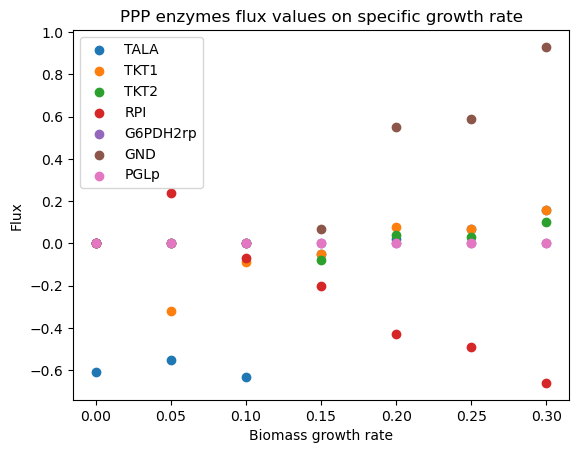

In [8]:
# Plot the flux values

x = GR_range
y = [TALA_fluxes, TKT1_fluxes, TKT2_fluxes, RPI_fluxes, G6PDH2rp_fluxes, GND_fluxes, PGLp_fluxes]
labels = ['TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp']
# plt.plot(x1, y1, label='Plot 1')
for i in range(len(x)):
    plt.scatter(x, y[i], label=labels[i])

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title('PPP enzymes flux values on specific growth rate')
plt.legend()
plt.show()
